# Smallest Last Ordering

**Critério de ordenação dos vértices:**  os vértices com o menor grau são colocados por último na ordem. A idéia desse critério é deixar os vértices mais flexíveis (com o menor grau) são coloridos por último. Os primeiros vértices tendem a ser com o maior grau.

In [1]:
def smallest_last_degree(G):

	residual_degree = {}
	Q = []
	for v in G.nodes:
		residual_degree[v] = len( G.adj[v] )
		Q.append( (residual_degree[v], v) )

	hq.heapify(Q)

	S = []
	while len(Q) > 0:
		(degree, v) = hq.heappop(Q)
		if v in S:
			continue
		#print(degree)
		S.append(v)
		for u in G.adj[v]:
			if u not in S:
				residual_degree[u] -= 1
				hq.heappush(Q, (residual_degree[u], u))
	S.reverse()
	return S


#Força Bruta

$(V, clique\_atual, best\_clique)$ representa um subproblema do problema da clique máxima.

O conjunto $V$ representa os vértices que podem entrar na clique atual.

O vetor $clique\_atual$ armazena os vértices que podem entrar na clique_atual.

O vetor $best\_clique$ armazena a melhor clique encontrada até o momento.

A regra de ramificação utilizada será selecionar os vértices com o maior rótulo.


**Limite Superior:** O tamanho de V é um limite superior para o tamanho da clique em V.


**Poda** $|clique\_atual| + |V| <= |best\_clique|$ então o subproblema $(V, clique\_atual, best\_clique)$ pode ser abandonado.


In [2]:
def is_clique(G, clique):

  for v in clique:
    for u in clique:
      if  u !=v and v not in G.adj[u]:
        return False
  return True

In [3]:
def brute(G, V, clique_atual, best_clique, number_of_nodes):
	number_of_nodes[0] += 1
	if len(V) == 0:
		if len(clique_atual) > len(best_clique):
			best_clique.clear()
			best_clique.extend(clique_atual)
	else:
		L = list(V)
		L.sort(reverse=True)
		for v in L:
			if len(clique_atual) + len(V) <= len(best_clique):
				return
			V2 = V.intersection(G.adj[v])
			clique_atual.append(v)
			V.remove(v)
			brute(G, V2, clique_atual, best_clique, number_of_nodes)
			clique_atual.pop()

In [4]:
def bruteAlgo(G):
	print("brute force")
	start_time = time.time()

	S = smallest_last_degree(G)
	rotulo = {}
	for i in range( len(S) ):
		rotulo[ S[i] ] = i
	G = nx.relabel_nodes(G, rotulo)

	clique_atual = []
	best_clique = []
	P = set(G.nodes())
	number_of_nodes = [ 0 ]

	brute(G, P, clique_atual, best_clique, number_of_nodes)

	end_time = time.time()
	elapsed_time = end_time - start_time
	print(f"Elapsed time: {elapsed_time:.6f} seconds")
	print("best_clique: ", best_clique)
	print("size: ", len(best_clique))
	print("number of nodes: ", number_of_nodes[0])
	print("is_clique: ", is_clique(G, best_clique))
	return best_clique, number_of_nodes, elapsed_time


In [5]:
import networkx as nx
import time
import heapq as hq
import math

#G = nx.gnp_random_graph(200, 0.5)
#best_clique, number_of_nodes, elapsed_time = bruteAlgo(G)


# Heurística de coloraçao gulosa

Essa heurística devolve dois vetores: order e ub.

In [6]:
def coloring(G, V):
	C = []
	for v in V:
		if len(C) == 0:
			C.append([v])
		else:
			entrou = False
			for c in C:
				if len([x for x in c if x in G.adj[v]]) == 0:
					c.append(v)
					entrou = True
					break
			if not entrou:
				C.append([v])

	order = []
	ub = []

	for i in range( len(C) ):
		for v in C[i]:
			order.append(v)
			ub.append(i+1)


	order.reverse()
	ub.reverse()
	return order, ub


# Algoritmo de Branch-and-Bound

In [7]:
def bb_clique(G, V, clique_atual, best_clique, number_of_nodes):
	number_of_nodes[0] += 1
	if len(V) == 0:
		if len(clique_atual) > len(best_clique):
			best_clique.clear()
			best_clique.extend(clique_atual)
	else:
		L = list(V)
		L.sort()


		order, ub = coloring(G, L)
		#print("(order,ub)", (order, ub) )
		for i in range( len(order) ):
			v = order[i]
			if len(clique_atual) + ub[i] <= len(best_clique):
				return
			V2 = V.intersection(G.adj[v])
			clique_atual.append(v)
			V.remove(v)
			bb_clique(G, V2, clique_atual, best_clique, number_of_nodes)
			clique_atual.pop()


# chamada do Algoritmo

In [8]:
def is_clique(G, clique):

  for v in clique:
    for u in clique:
      if  u !=v and v not in G.adj[u]:
        return False
  return True

def algo(G):
	print("branch and bound")
	start_time = time.time()

	S = smallest_last_degree(G)
	rotulo = {}
	for i in range( len(S) ):
		rotulo[ S[i] ] = i
	G = nx.relabel_nodes(G, rotulo)

	clique_atual = []
	best_clique = []
	P = set(G.nodes())
	number_of_nodes = [ 0 ]



	bb_clique(G,  P , clique_atual, best_clique, number_of_nodes )
	end_time = time.time()
	elapsed_time = end_time - start_time
	print(f"Elapsed time: {elapsed_time:.6f} seconds")
	print("best_clique: ", best_clique)
	print("size: ", len(best_clique))
	print("number of nodes: ", number_of_nodes[0])
	print("is_clique: ", is_clique(G, best_clique))
	return best_clique, number_of_nodes, elapsed_time


# Teste do Algoritmo

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import csv
import heapq as hq
import math

#for i in range(5):
#		G = nx.gnp_random_graph(200, 0.5)
#		best_clique1, number_of_nodes1, elapsed_time1 = algo(G)


# Heurística de Coloração com paralelismo de bits

Nesta heurística de coloração, a coloração é construída por classe de cores. As operações de diferença de conjuntos e intersecção são realizadas utilizando o paralelismo de bits

In [10]:
!pip install roaringbitmap

In [11]:
from roaringbitmap import RoaringBitmap

def bitcoloringRoaring(adj, V):
    order = []
    ub = []
    index = 1
    R = V.copy()
    sizeR = len(R)

    #print("colorindo ", V)
    while sizeR > 0:
        S = R.copy()
        #print("[", end = "")
        while len(S) > 0:
            v = S.min()
            #print(",", v, end = "")
            order.append(v)
            ub.append(index)
            S -= adj[v]
            R.remove(v)
            S.remove(v)
            sizeR -= 1
        #print("]")
        index += 1

    return order, ub



# BITClique

In [12]:
def bitcliqueRoar(G, V, clique_atual, best_clique, number_of_nodes):
    number_of_nodes[0] += 1
    sizeV = len(V)

    if sizeV == 0:
        if len(clique_atual) > len(best_clique):
            best_clique[:] = clique_atual.copy()
    else:
        order, ub = bitcoloringRoaring(G, V)
        m = len(order)
        for i in range(m-1, -1, -1):
            v = order[i]
            if len(clique_atual) + ub[i] <= len(best_clique):
                return
            V2 = V.copy()
            V2 &= G[v]
            V.remove(v)
            clique_atual.append(v)
            bitcliqueRoar(G, V2, clique_atual, best_clique, number_of_nodes)
            clique_atual.pop()



# Teste do Algoritmo

In [13]:
def algoBitCliqueRoar(G):
	print("branch and bound roar")
	start_time = time.time()

	S = smallest_last_degree(G)
	rotulo = {}
	for i in range( len(S) ):
		rotulo[ S[i] ] = i
	G = nx.relabel_nodes(G, rotulo)

	adj = []
	n = len(G.nodes)
	for i in range( n ):
		#print( list( G.adj[i]) )
		adj.append(  RoaringBitmap( list( G.adj[i])  ) )

	clique_atual = []
	best_clique = []
	V = RoaringBitmap( [ i for i in range(n) ])
	number_of_nodes = [ 0 ]


	bitcliqueRoar( adj ,  V , clique_atual, best_clique, number_of_nodes )

	end_time = time.time()
	elapsed_time = end_time - start_time
	print(f"Elapsed time: {elapsed_time:.6f} seconds")
	print("best_clique: ",  best_clique)
	print("size: ", len(best_clique) )
	print("number of nodes: ", number_of_nodes[0])
	return best_clique, number_of_nodes, elapsed_time



In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import csv
import heapq as hq
import math



#for i in range(1):
#  G = nx.gnp_random_graph(300, 0.5)
#  best_clique1, number_of_nodes1, elapsed_time1 = algo(G)
#  best_clique2, number_of_nodes2, elapsed_time2 = algoBitCliqueRoar(G)


# Problema do subgrafo k partido máximo

A idéia é usar a heurística de coloração para encontrar o maior subgrafo k partido (maior subgrafo que pode ser colorido com k cores). A função **max\_kpartite(adj, V, l)** recebe uma matriz de bitArray adjacência representando a vizinhança de cada vértice, um bitArray V representando os vértices de um subproblema e um valor $l$ representando o número de cores.

A função **max\_kpartite(adj, V, l)** devolve um conjunto $R$ tal que $V = S \cup R$ e $G[S]$ é $l$-colorido.


In [15]:
def max_kpartite(adj, V, l):
    index = 1
    R = V.copy()
    sizeR = len(R)

    while sizeR > 0 and index <= l:
        S = R.copy()
        while len(S) > 0:
            v = S.min()
            S -= adj[v]
            R.remove(v)
            S.remove(v)
            sizeR -= 1
        index += 1
    return R



# BitCliquePartite

In [16]:
def bitcliquePartite(G, V, clique_atual, best_clique, number_of_nodes):
    number_of_nodes[0] += 1
    sizeV = len(V)

    if sizeV == 0:
        if len(clique_atual) > len(best_clique):
            best_clique[:] = clique_atual[:]
    else:
        l = len(best_clique) - len(clique_atual)
        R = max_kpartite(G, V, l)

        order = list(R)

        m = len(order)
        for i in range(m-1, -1, -1):
            v = order[i]
            V2 = V.copy()
            V2 &= G[v]
            V.remove(v)
            clique_atual.append(v)
            bitcliquePartite(G, V2, clique_atual, best_clique, number_of_nodes)
            clique_atual.pop()


# Chamada

In [17]:
def algoBitCliqueMaxPartite(G):
	print("branch and bound roar")
	start_time = time.time()

	S = smallest_last_degree(G)
	rotulo = {}
	for i in range( len(S) ):
		rotulo[ S[i] ] = i
	G = nx.relabel_nodes(G, rotulo)

	adj = []
	n = len(G.nodes)
	for i in range( n ):
		#print( list( G.adj[i]) )
		adj.append(  RoaringBitmap( list( G.adj[i])  ) )

	clique_atual = []
	best_clique = []
	V = RoaringBitmap( [ i for i in range(n) ])
	number_of_nodes = [ 0 ]


	bitcliquePartite( adj ,  V , clique_atual, best_clique, number_of_nodes )

	end_time = time.time()
	elapsed_time = end_time - start_time
	print(f"Elapsed time: {elapsed_time:.6f} seconds")
	print("best_clique: ",  best_clique)
	print("size: ", len(best_clique) )
	print("number of nodes: ", number_of_nodes[0])
	return best_clique, number_of_nodes, elapsed_time



# Bonecas Russas

A função separate recebe um bitmap V representando os vértices de um grafo e um valor l e devolve dois conjuntos U e R tal que $\omega(U) \leq l$ e $R = V - U$, ou seja, o conjunto U é encontrando por uma heurísitca de coloração gulosa.  

In [18]:
def separate(adj, V, l):
    index = 1
    R = V.copy()
    U =  RoaringBitmap()

    sizeR = len(R)

    while sizeR > 0 and index <= l:
        S = R.copy()
        while len(S) > 0:
            v = S.min()
            S -= adj[v]
            U.add(v)
            R.remove(v)
            S.remove(v)
            sizeR -= 1
        index += 1
    return U, R


**Boneca**

Uma boneca é um subproblema $(V, clique\_atual, best\_clique)$. Cada boneca é composta por várias bonecas menores. Depois da chamada da função $separate(G, V, l)$ devolvendo $V = U \cup R$, seja $(r_1, \ldots, r_k)$ os vértices de R. As seguintes bonecas serão resolvidas:

* $(U \cup \{r_1\}, clique\_atual, best\_clique)$
* $(U \cup \{r_1,r_2\}, clique\_atual, best\_clique)$
* $(U \cup \{r_1, r_2, r_3\}, clique\_atual, best\_clique)$
* $\ldots$
* $(U \cup \{r_1, \ldots, r_k\}, clique\_atual, best\_clique)$

De maneira geral, os vértices da i-ésima boneca será

$B_i = U \cup \{r_1, \ldots, r_i\}$

Na i-ésima boneca, adicionaremos o último vértice $r_i$. Logo, cada boneca resolve o seguinte problema:
* $(B_i \cap N(r_i), clique\_atual \cup \{r_i\}, best\_clique)$




In [19]:
def dool(G, V, clique_atual, best_clique, number_of_nodes):
	number_of_nodes[0] += 1
	sizeV = len(V)


	if sizeV == 0:
		if len(clique_atual) > len(best_clique):
		    best_clique[:] = clique_atual[:]
		    return True
	else:

		l = len(best_clique) - len(clique_atual)
		U, R = separate(G, V, l)
		order = list(R)
		m = len(order)
		for i in range(m):
			v = order[i]
			V2 = U.copy()
			V2 &= G[v]
			clique_atual.append(v)
			flag = dool(G, V2, clique_atual, best_clique, number_of_nodes)
			if flag:
				return True
			clique_atual.pop()
			U.add(v)
		return False


#Boneca Russas

In [20]:
def russianDools(G):
	print("Russian Dools")
	start_time = time.time()

	S = smallest_last_degree(G)
	rotulo = {}
	for i in range( len(S) ):
		rotulo[ S[i] ] = i
	G = nx.relabel_nodes(G, rotulo)

	adj = []
	n = len(G.nodes)
	for i in range( n ):
		#print( list( G.adj[i]) )
		adj.append(  RoaringBitmap( list( G.adj[i])  ) )

	clique_atual = []
	best_clique = [0]
	V = RoaringBitmap( [0] )
	number_of_nodes = [ 0 ]



	for i in range(1, n):
		clique_atual = []
		clique_atual.append(i)
		V2 = V.copy()
		V2 &= adj[i]
		dool(adj, V2, clique_atual, best_clique,number_of_nodes)
		V.add(i)




	end_time = time.time()
	elapsed_time = end_time - start_time
	print(f"Elapsed time: {elapsed_time:.6f} seconds")
	print("best_clique: ",  best_clique)
	print("size: ", len(best_clique) )
	print("number of nodes: ", number_of_nodes[0])
	return best_clique, number_of_nodes, elapsed_time



In [21]:
def convert_to_dimacs(G):
    vertex_map = {vertex: idx + 1 for idx, vertex in enumerate(G.nodes())}
    
    dimacs_lines = []
    
    # Adiciona as arestas no formato DIMACS
    for edge in G.edges():
        dimacs_lines.append(f"e {vertex_map[edge[0]]} {vertex_map[edge[1]]}")
    
    # Constrói o cabeçalho DIMACS
    dimacs_header = f"p edge {len(G.nodes())} {len(G.edges())}"
    
    # Junta todas as linhas DIMACS em uma única string
    dimacs_content = "\n".join(dimacs_lines)
    
    # Retorna o cabeçalho e o conteúdo DIMACS
    return f"{dimacs_header}\n{dimacs_content}"

In [22]:
import subprocess
import time

def bbmcs(G):
    with open('graph.dimacs', 'w') as f:
        f.write(convert_to_dimacs(G))
    
    start_time = time.time()
    subprocess.run(['sage', '-python', 'maxcliquebb-master/bin/mc', '--alg', 'mcs', 'graph.dimacs'])
    end_time = time.time()
    return (end_time-start_time)

# Testando

In [23]:
import csv



data = [ "nodes", "densidade", "algoBitCliqueMaxPartite (tempo)", "russianDools (tempo)" , "mcs (tempo)", "algoBitCliqueMaxPartite (nodes)", "russianDools (nodes)"]
with open('exato.csv', 'w', encoding='UTF8', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(data)


for i in range(10):
  nodes = 2000
  densidade = 0.25
  G = nx.gnp_random_graph(nodes, densidade)
  best_clique1, number_of_nodes1, elapsed_time1 = algoBitCliqueMaxPartite(G)
  best_clique2, number_of_nodes2, elapsed_time2 = russianDools(G)
  elapsed_time3 = bbmcs(G)

  data = [ nodes, densidade, elapsed_time1, elapsed_time2, elapsed_time3, number_of_nodes1[0], number_of_nodes2[0] ]
  with open('exato.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data)


for i in range(10):
  nodes = 500
  densidade = 0.5
  G = nx.gnp_random_graph(nodes, densidade)
  best_clique1, number_of_nodes1, elapsed_time1 = algoBitCliqueMaxPartite(G)
  best_clique2, number_of_nodes2, elapsed_time2 = russianDools(G)
  elapsed_time3 = bbmcs(G)

  data = [ nodes, densidade, elapsed_time1, elapsed_time2, elapsed_time3, number_of_nodes1[0], number_of_nodes2[0] ]
  with open('exato.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data)

for i in range(10):
  nodes = 250
  densidade = 0.75
  G = nx.gnp_random_graph(nodes, densidade)
  best_clique1, number_of_nodes1, elapsed_time1 = algoBitCliqueMaxPartite(G)
  best_clique2, number_of_nodes2, elapsed_time2 = russianDools(G)
  elapsed_time3 = bbmcs(G)

  data = [ nodes, densidade, elapsed_time1, elapsed_time2, elapsed_time3, number_of_nodes1[0], number_of_nodes2[0] ]
  with open('exato.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data)

for i in range(10):
  nodes = 150
  densidade = 0.9
  G = nx.gnp_random_graph(nodes, densidade)
  best_clique1, number_of_nodes1, elapsed_time1 = algoBitCliqueMaxPartite(G)
  best_clique2, number_of_nodes2, elapsed_time2 = russianDools(G)
  elapsed_time3 = bbmcs(G)

  data = [ nodes, densidade, elapsed_time1, elapsed_time2, elapsed_time3, number_of_nodes1[0], number_of_nodes2[0] ]
  with open('exato.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data)

branch and bound roar
Elapsed time: 52.887900 seconds
best_clique:  [1909, 1776, 1521, 1455, 1251, 1207, 1195, 487, 449, 31]
size:  10
number of nodes:  1759819
Russian Dools
Elapsed time: 64.287492 seconds
best_clique:  [1909, 1776, 1521, 1455, 1251, 1207, 1195, 487, 449, 31]
size:  10
number of nodes:  2512435
feito
branch and bound roar
Elapsed time: 49.978447 seconds
best_clique:  [1874, 1793, 1236, 1177, 856, 802, 401, 397, 314, 142]
size:  10
number of nodes:  1817737
Russian Dools
Elapsed time: 60.933880 seconds
best_clique:  [1790, 1057, 1046, 1788, 766, 757, 735, 594, 485, 484]
size:  10
number of nodes:  2335320
feito
branch and bound roar
Elapsed time: 55.528883 seconds
best_clique:  [1465, 885, 780, 779, 580, 348, 290, 286, 276, 81]
size:  10
number of nodes:  2285335
Russian Dools
Elapsed time: 54.426470 seconds
best_clique:  [1465, 885, 780, 779, 580, 348, 290, 286, 276, 81]
size:  10
number of nodes:  1927187
feito
branch and bound roar
Elapsed time: 52.276837 seconds
be

In [2]:
import csv

with open('exato.csv', 'r', encoding='UTF8') as f:
    reader = csv.reader(f)
    header = next(reader)

    dados_agrupados = []
    current_group = []
    i=0
    for row in reader:
        # Converte os valores numéricos de string para float
        converted_row = []
        for j, valor in enumerate(row):
            if j == 2 or j == 3 or j == 4:
                converted_row.append(float(valor))
            elif j == 5 or j == 6:
                converted_row.append(int(valor))
        current_group.append(converted_row)
        i+=1
        
        # A cada 10 linhas salva na lista
        if i % 10 == 0:
            dados_agrupados.append(current_group)
            current_group = []

medias_agrupadas = []
for grupo in dados_agrupados:
    media_grupo = []
    for col in range(5):
        coluna_valores = [linha[col] for linha in grupo]
        media_grupo.append(round(sum(coluna_valores) / len(coluna_valores), 2))
    medias_agrupadas.append(media_grupo)

with open('medias1.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    header = ["nodes", "densidade", "algoBitCliqueMaxPartite (tempo medio)", "russianDools (tempo medio)", "mcs (tempo medio)", "algoBitCliqueMaxPartite (nodes medio)", "russianDools (nodes medio)"]
    writer.writerow(header)
    for i, nodes_densidade in enumerate([(2000, 0.25), (500, 0.5), (250, 0.75), (150, 0.9)]):
        nodes, densidade = nodes_densidade
        data = [
            nodes,
            densidade,
            medias_agrupadas[i][0],
            medias_agrupadas[i][1],
            medias_agrupadas[i][2],
            "{:.2e}".format(medias_agrupadas[i][3]),
            "{:.2e}".format(medias_agrupadas[i][4])
        ]
        writer.writerow(data)

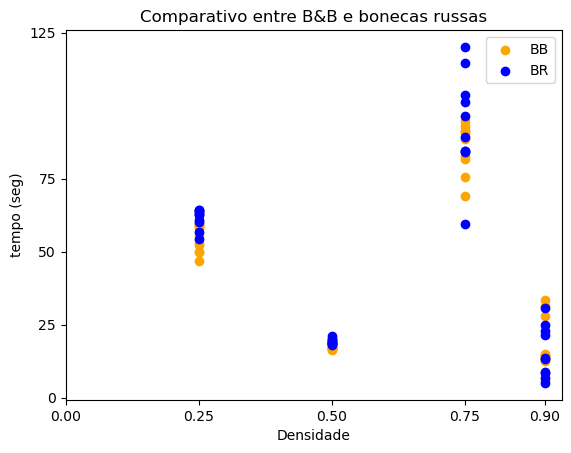

In [3]:
import csv
import matplotlib.pyplot as plt

x = []
y = []
y2 = []
for i in range(40):
    if i<10:
        x.append(0.25)
    elif i<20:
        x.append(0.5)
    elif i<30:
        x.append(0.75)
    elif i<40:
        x.append(0.9)

with open('exato.csv', newline='') as csvfile:
    # Cria um leitor CSV
    csvreader = csv.reader(csvfile, delimiter=',')
    # Itera sobre as linhas do arquivo
    next(csvreader)
    for row in csvreader:
        # Adiciona a linha como um dicionário à lista de dados
        y.append(round(float(row[2]), 2))
        y2.append(round(float(row[3]), 2))

plt.scatter(x, y, color='orange', label='BB')
plt.scatter(x, y2, color='blue', label='BR')
plt.xlabel('Densidade')
plt.ylabel('tempo (seg)')
plt.title('Comparativo entre B&B e bonecas russas')
plt.legend()
plt.yticks([0, 25, 50, 75, 125])
plt.xticks([0, 0.25, 0.5, 0.75, 0.9])
plt.savefig('grafico.png')